# Library Instalation

In [47]:
import os

# List of required libraries
libraries = [
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn',
    'pdpbox'
]
"""
# Install each library using pip
for lib in libraries:
    os.system(f'pip install {lib}')
"""

"\n# Install each library using pip\nfor lib in libraries:\n    os.system(f'pip install {lib}')\n"

# Load Dataset

In [48]:
import pandas as pd
import numpy as np

reviews = pd.read_csv("music_survey.csv")
print(reviews.head())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

# Data Cleaning

In [49]:
# Check for missing values
print(reviews.isnull().sum())

# Handle missing values (if any)
# For numeric columns: 
reviews.fillna(0, inplace=True)
reviews.fillna('Unknown', inplace=True)
# Check the data types of columns and handle if necessary
print(reviews.dtypes)
# Convert columns to appropriate types if needed (e.g., converting object to categorical, etc.)


Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

# Data Visualization

In [50]:
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Count of unique values in categorical columns
unique_counts = reviews.select_dtypes(include='object').nunique()

print(summary_stats)
print(unique_counts)

# Summary statistics for numerical columns
summary_stats = reviews.describe()

# Variation 1: Histograms for Age and Hours per day
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(reviews['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
plt.hist(reviews['Hours per day'], bins=15, color='salmon', edgecolor='black')
plt.xlabel('Hours per day')
plt.ylabel('Frequency')
plt.title('Distribution of Hours per day')

plt.tight_layout()
plt.show()

# Variation 2: Countplot for Primary streaming service
plt.figure(figsize=(8, 5))
reviews['Primary streaming service'] = reviews['Primary streaming service'].astype(str)  # Ensure column is of string type
order = reviews['Primary streaming service'].value_counts().index.sort_values(ascending=True)
sns.countplot(y='Primary streaming service', data=reviews, order=order, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Primary streaming service')
plt.title('Count of Users by Primary streaming service (Descending)')
plt.tight_layout()
plt.show()

# Variation 3: Boxplot for Anxiety, Depression, Insomnia, and OCD
plt.figure(figsize=(8, 6))
sns.boxplot(data=reviews[['Anxiety', 'Depression', 'Insomnia', 'OCD']], palette='pastel')
plt.xlabel('Symptoms')
plt.ylabel('Score')
plt.title('Boxplot of Mental Health Symptoms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Variation 4: Pairplot for Age, Hours per day, Anxiety, Depression, Insomnia, and OCD
columns_of_interest = ['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
sns.pairplot(reviews[columns_of_interest], diag_kind='kde')
plt.suptitle('Pairplot of Various Features', y=1.02)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Histogram for 'Age' column
plt.hist(reviews['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Bar plot for 'Primary streaming service'
service_counts = reviews['Primary streaming service'].value_counts()
service_counts.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Primary Streaming Service')
plt.show()

# Box plot for 'Hours per day'
plt.boxplot(reviews['Hours per day'])
plt.xlabel('Hours')
plt.title('Hours per Day Box Plot')
plt.show()

# Count plot for 'Exploratory'
sns.countplot(data=reviews, x='Exploratory')
plt.title('Exploratory Count')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot or Violin Plot for Age vs. Primary streaming service
plt.figure(figsize=(10, 6))
sns.boxplot(x='Primary streaming service', y='Age', data=reviews, palette='Set2')
plt.xlabel('Primary streaming service')
plt.ylabel('Age')
plt.title('Age Distribution Across Primary Streaming Services')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = reviews.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# Example: Countplot for 'While working'
plt.figure(figsize=(8, 6))
sns.countplot(x='While working', data=reviews, palette='Set2')
plt.title('Count of Responses while Working')
plt.xlabel('While Working')
plt.ylabel('Count')
plt.show()

exploratory_counts = reviews['Exploratory'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(exploratory_counts, labels=exploratory_counts.index, autopct='%1.1f%%')
plt.title('Exploratory Responses')
plt.show()

# Pairplot or Scatterplot for selected features
selected_features = ['Age', 'Hours per day', 'Anxiety', 'Depression']
sns.pairplot(reviews[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(y='Fav genre', data=reviews, palette='viridis', order=reviews['Fav genre'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Favorite Genre')
plt.title('Favorite Genre Distribution')
plt.tight_layout()
plt.show()

# Bar Chart for Exploratory
plt.figure(figsize=(8, 5))
sns.countplot(x='Exploratory', data=reviews, palette='viridis')
plt.xlabel('Exploratory')
plt.ylabel('Count')
plt.title('Exploratory Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Music effects', data=reviews, palette='Set3')
plt.title('Count of Music Effects')
plt.xlabel('Music Effects')
plt.ylabel('Count')
plt.show()

music_effects_counts = reviews['Music effects'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(music_effects_counts, labels=music_effects_counts.index, autopct='%1.1f%%')
plt.title('Music Effects Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Fav genre', hue='Music effects', data=reviews, palette='viridis')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.title('Music Effects by Favorite Genre')
plt.legend(title='Music Effects')
plt.xticks(rotation=45)  # Rotating x-axis labels
plt.tight_layout()
plt.show()

# Assuming numerical columns need outlier analysis
numerical_columns = reviews.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(10, 6))
sns.boxplot(data=reviews[numerical_columns], orient='h', palette='Set2')
plt.title('Outlier Detection for Numerical Columns')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='TotalMusicFreq', data=reviews)
plt.title('Age vs. Total Music Frequency')
plt.xlabel('Age')
plt.ylabel('Total Music Frequency')
plt.show()

# Using a count plot for categorical columns
categorical_columns = ['While working', 'Instrumentalist', 'Composer', 'Exploratory']

plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=reviews, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Extracting the month from the timestamp
reviews['Timestamp'] = pd.to_datetime(reviews['Timestamp'])
reviews['Month'] = reviews['Timestamp'].dt.month_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=reviews, palette='Set3')
plt.title('Distribution of Responses by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a heatmap to understand the correlation between emotions and genres
emotions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
genres = ['Fav genre', 'Exploratory']

cross_table = pd.pivot_table(reviews, index='Fav genre', columns='Anxiety', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(cross_table, annot=True, cmap='coolwarm', fmt='g')
plt.title('Correlation between Fav genre and Anxiety')
plt.xlabel('Anxiety')
plt.ylabel('Fav genre')
plt.show()

# Creating a new feature: Ratio of hours spent per day while working
reviews['Hours_ratio'] = reviews['Hours per day'] / reviews['While working'].map({'Yes': 1, 'No': 24})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_ratio', y='TotalMusicFreq', data=reviews)
plt.title('Ratio of Hours spent vs. Total Music Frequency')
plt.xlabel('Hours Ratio')
plt.ylabel('Total Music Frequency')
plt.show()
"""

"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Count of unique values in categorical columns\nunique_counts = reviews.select_dtypes(include='object').nunique()\n\nprint(summary_stats)\nprint(unique_counts)\n\n# Summary statistics for numerical columns\nsummary_stats = reviews.describe()\n\n# Variation 1: Histograms for Age and Hours per day\nplt.figure(figsize=(10, 5))\n\nplt.subplot(1, 2, 1)\nplt.hist(reviews['Age'], bins=20, color='skyblue', edgecolor='black')\nplt.xlabel('Age')\nplt.ylabel('Frequency')\nplt.title('Distribution of Age')\n\nplt.subplot(1, 2, 2)\nplt.hist(reviews['Hours per day'], bins=15, color='salmon', edgecolor='black')\nplt.xlabel('Hours per day')\nplt.ylabel('Frequency')\nplt.title('Distribution of Hours per day')\n\nplt.tight_layout()\nplt.show()\n\n# Variation 2: Countplot for Primary streaming service\nplt.figure(figsize=(8, 5))\nreviews['Primary streaming service'] = reviews['Primary streaming service'].astype(str)  # Ensure column is of strin

# Correct Data Visualization

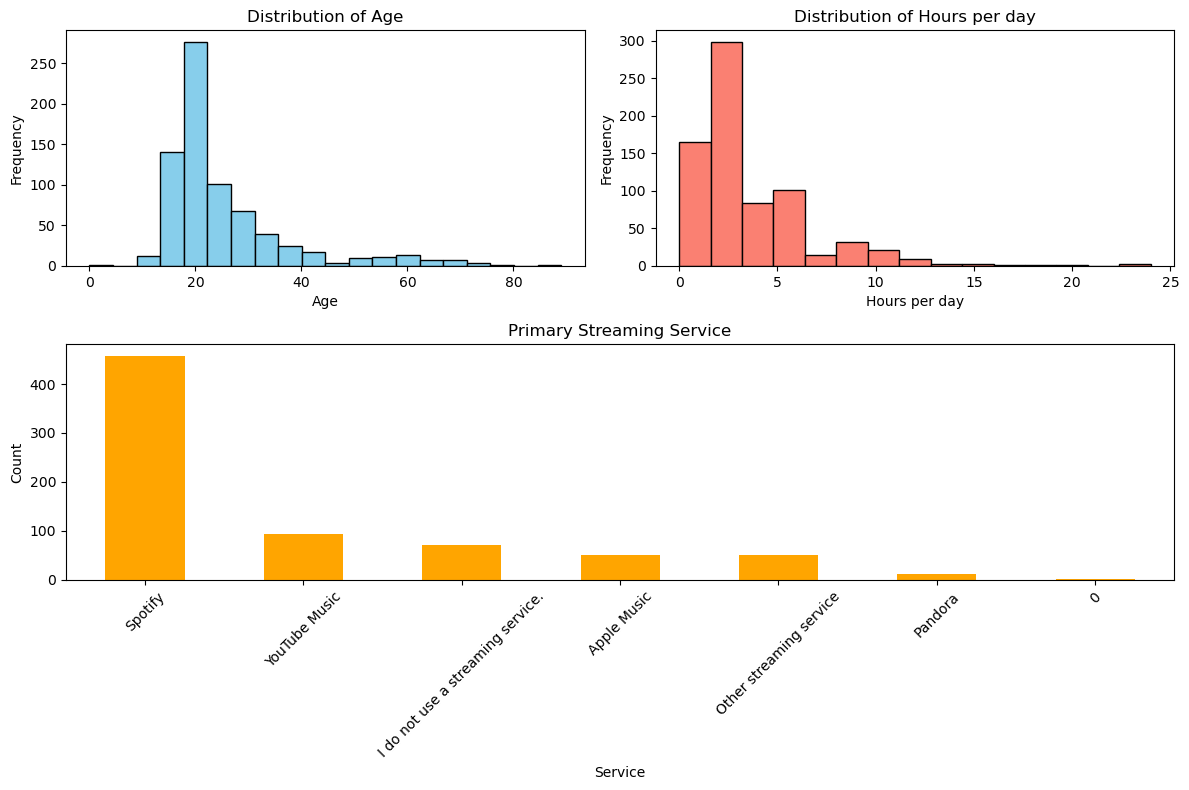

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

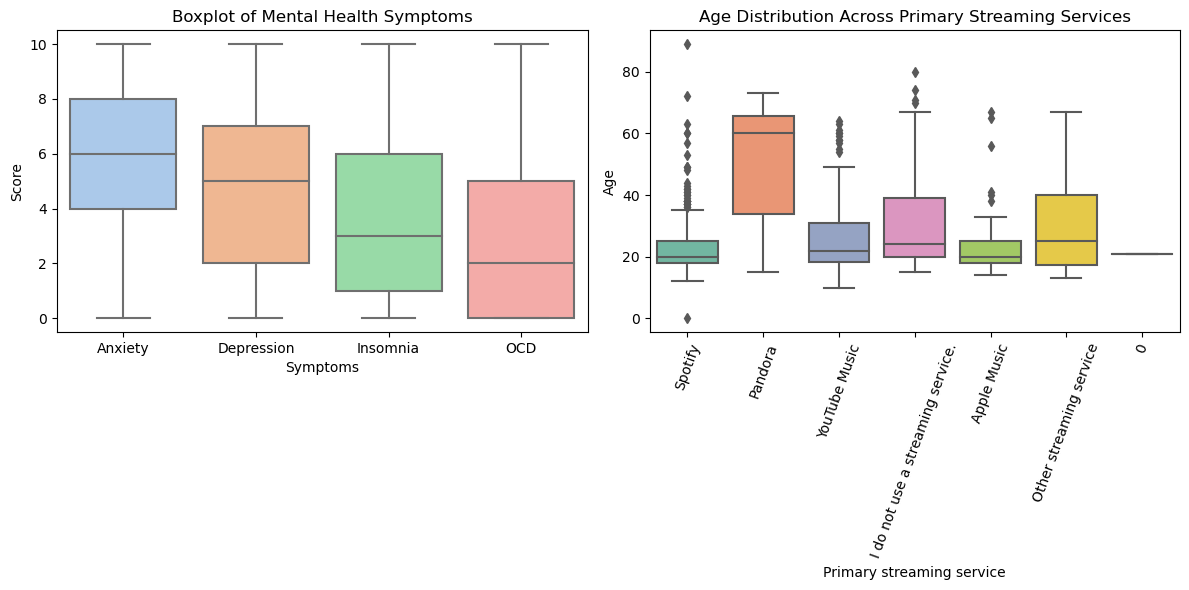

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

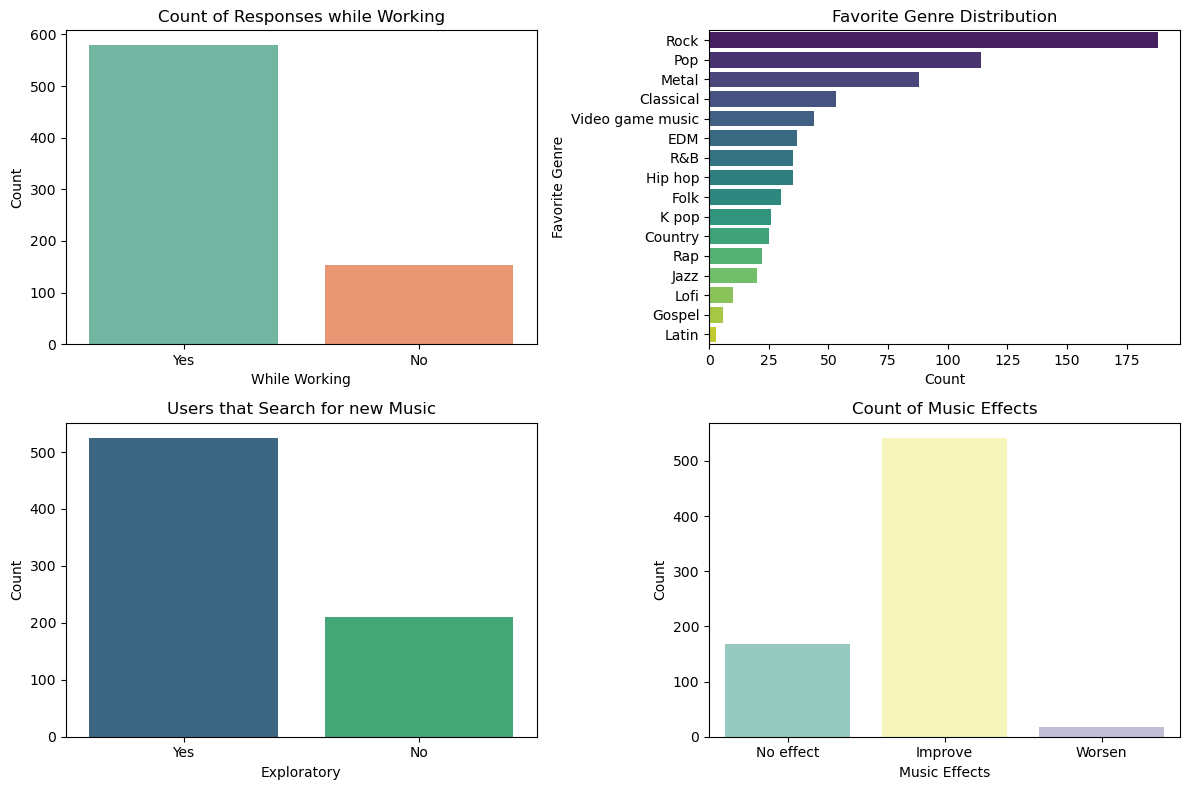

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for Age and Hours per day
plt.figure(figsize=(12, 8))

# Histogram for Age
plt.subplot(2, 2, 1)
plt.hist(reviews['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Histogram for Hours per day
plt.subplot(2, 2, 2)
plt.hist(reviews['Hours per day'], bins=15, color='salmon', edgecolor='black')
plt.xlabel('Hours per day')
plt.ylabel('Frequency')
plt.title('Distribution of Hours per day')

# Bar plot for 'Primary streaming service'
plt.subplot(2, 1, 2)
service_counts = reviews['Primary streaming service'].value_counts()
service_counts.plot(kind='bar', color='orange')
plt.xticks(rotation=45)
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Primary Streaming Service')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=reviews[['Anxiety', 'Depression', 'Insomnia', 'OCD']], palette='pastel')
plt.xlabel('Symptoms')
plt.ylabel('Score')
plt.title('Boxplot of Mental Health Symptoms')

plt.subplot(1, 2, 2)
sns.boxplot(x='Primary streaming service', y='Age', data=reviews, palette='Set2')
plt.xlabel('Primary streaming service')
plt.xticks(rotation=70)
plt.ylabel('Age')
plt.title('Age Distribution Across Primary Streaming Services')

plt.tight_layout()
plt.show()

# Countplots

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='While working', data=reviews[reviews['While working'] != 0], palette='Set2')
plt.title('Count of Responses while Working')
plt.xlabel('While Working')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(y='Fav genre', data=reviews[reviews['Fav genre'] != 0], palette='viridis', order=reviews['Fav genre'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Favorite Genre')
plt.title('Favorite Genre Distribution')

# Countplot for 'Exploratory'
plt.subplot(2, 2, 3)
sns.countplot(x='Exploratory', data=reviews[reviews['Exploratory'] != 0], palette='viridis')
plt.xlabel('Exploratory')
plt.ylabel('Count')
plt.title('Users that Search for new Music')

plt.subplot(2, 2, 4)
sns.countplot(x='Music effects', data=reviews[reviews['Music effects'] != 0], palette='Set3')
plt.title('Count of Music Effects')
plt.xlabel('Music Effects')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Feature Engineering

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


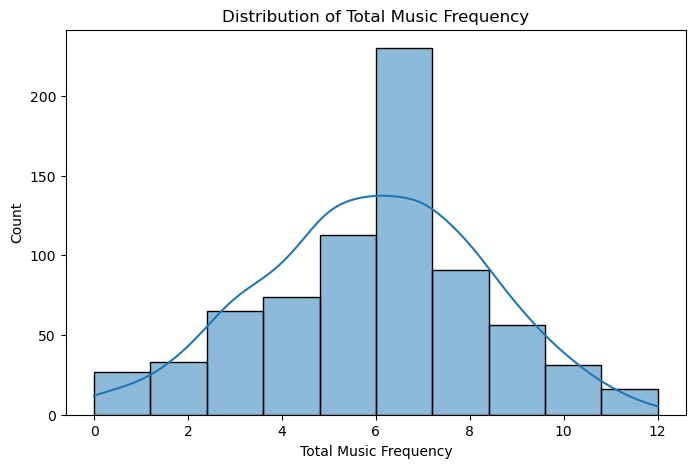

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

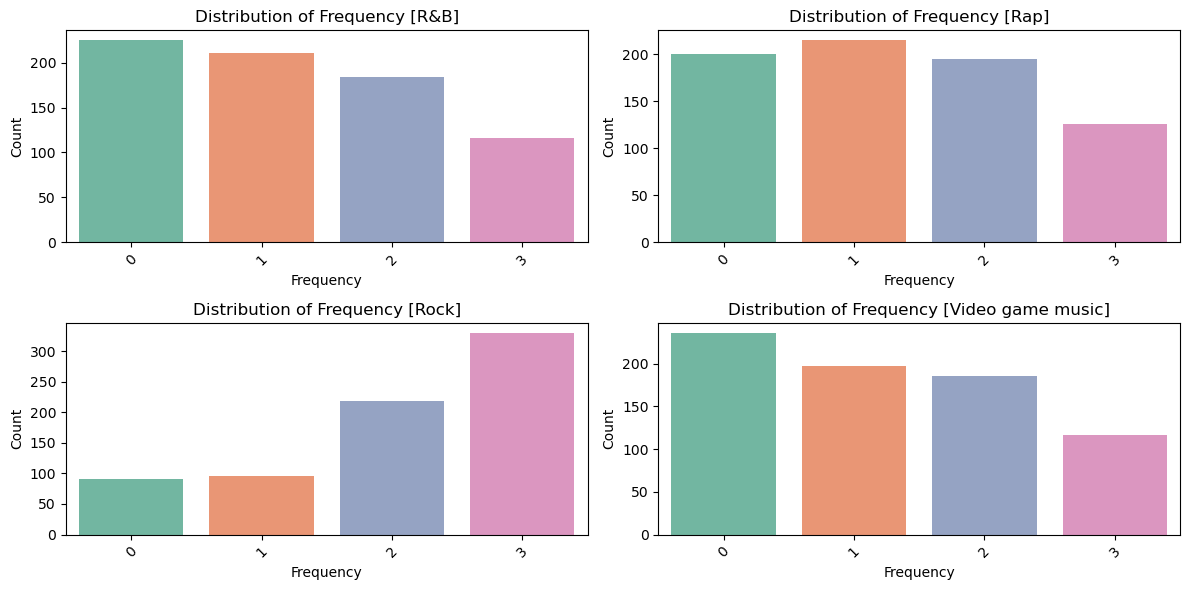

In [52]:
# Summing up the frequencies of different music genres to create a new feature 'TotalMusicFreq'

# List of columns containing frequency information
frequency_columns = ['Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

# Replace categorical values with numeric values for frequency columns
# Assign numerical values to the categories (e.g., 'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3)
mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
reviews[frequency_columns] = reviews[frequency_columns].replace(mapping)

# Create a new feature 'TotalMusicFreq' by summing up frequencies of different music genres
reviews['TotalMusicFreq'] = reviews[frequency_columns].sum(axis=1)

# Visualize the new feature
plt.figure(figsize=(8, 5))
sns.histplot(reviews['TotalMusicFreq'], bins=10, kde=True)
plt.xlabel('Total Music Frequency')
plt.ylabel('Count')
plt.title('Distribution of Total Music Frequency')
plt.show()

# Get the count of unique values in each frequency column and select the top 4 columns by count
top_frequency_columns = reviews[frequency_columns].apply(pd.Series.value_counts).sum().nlargest(4).index

plt.figure(figsize=(12, 6))
for i, column in enumerate(top_frequency_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=reviews, palette='Set2')
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# Implement Model

In [53]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecting relevant features
emotional_features = ['Anxiety', 'Depression', 'Insomnia']
music_features = ['Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

# Combining the selected features
selected_features = emotional_features + music_features

# Defining features (X) and the target variable (y)
X = reviews[selected_features]
y = reviews['TotalMusicFreq']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Viewing the model coefficients
coefficients = model.coef_
print("Coefficients:", coefficients)


Mean Squared Error: 6.964221915294371e-30
Coefficients: [ 1.38441663e-17 -8.32667268e-17 -1.92151792e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00]


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# Correct Model

In [54]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Considering 'Anxiety', 'Depression', 'Insomnia' as emotional features
emotional_features = ['Anxiety', 'Depression', 'Insomnia']
music_features = ['Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

# Define features (X) and the target variable (y)
X = reviews[emotional_features + music_features]
y = reviews['TotalMusicFreq']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (using Mean Squared Error as an example)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# If you need to inspect coefficients
coefficients = model.coef_
print("Coefficients:", coefficients)


Mean Squared Error: 6.964221915294371e-30
Coefficients: [ 1.38441663e-17 -8.32667268e-17 -1.92151792e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00]


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# RandomForest

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and the target variable (y)
X = reviews[emotional_features + music_features]
y = reviews['TotalMusicFreq']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Fit the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model (using Mean Squared Error as an example)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# View feature importances
feature_importances = random_forest.feature_importances_
print("Feature Importances:", feature_importances)

Mean Squared Error: 0.13591081081081083
Feature Importances: [0.00822671 0.00888577 0.00954583 0.18107313 0.41029562 0.17100317
 0.21096977]


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# RandomForest with Hyperparameters

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest model with the best hyperparameters
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
predictions = random_forest.predict(X_test)

# Evaluate model performance using mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Random Forest Mean Squared Error: {mse}")

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Random Forest Mean Squared Error: 0.1309952972972973


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# Model Alternatives

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Define a scorer (such as Mean Squared Error) to evaluate models
scorer = make_scorer(mean_squared_error)

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    print(f"{name} Mean Squared Error: {scores.mean()} (± {scores.std()})")

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Linear Regression Mean Squared Error: 1.883985887529526e-29 (± 2.5610401421352394e-29)


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Random Forest Mean Squared Error: 0.15759464146023466 (± 0.044473786379197425)
Gradient Boosting Mean Squared Error: 0.02759875659108165 (± 0.016305324506680593)
Decision Tree Mean Squared Error: 0.4117340286831812 (± 0.11169576064653929)


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# Alternatives with Hyperparameters

In [58]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Define models with their respective hyperparameters for tuning
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Define hyperparameters for each model
hyperparameters = {
    'Random Forest': {'n_estimators': [100, 300, 500]},
    'Gradient Boosting': {'n_estimators': [100, 300, 500], 'learning_rate': [0.05, 0.1, 0.2]}
    # Add other models' hyperparameters here
}

# Define a scorer (such as Mean Squared Error) to evaluate models
scorer = make_scorer(mean_squared_error)

# Perform hyperparameter tuning and cross-validation for each model
for name, model in models.items():
    if name in hyperparameters:
        grid_search = GridSearchCV(model, hyperparameters[name], cv=5, scoring=scorer)
        grid_search.fit(X_train, y_train)
        print(f"{name} Best Parameters: {grid_search.best_params_}")
        print(f"{name} Mean Squared Error: {grid_search.best_score_} (± {grid_search.cv_results_['std_test_score'][grid_search.best_index_]})")
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
        print(f"{name} Mean Squared Error: {scores.mean()} (± {scores.std()})")

Linear Regression Mean Squared Error: 1.883985887529526e-29 (± 2.5610401421352394e-29)


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Random Forest Best Parameters: {'n_estimators': 100}
Random Forest Mean Squared Error: 0.15759464146023466 (± 0.044473786379197425)


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Gradient Boosting Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Gradient Boosting Mean Squared Error: 0.05645158350589299 (± 0.022488535162075753)
Decision Tree Mean Squared Error: 0.4117340286831812 (± 0.11169576064653929)


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [59]:
param_grid = {
    'Linear Regression': {},  # No hyperparameters to tune for Linear Regression
    'Random Forest': {'n_estimators': [100, 300, 500, 800]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]}
}

for name, model in models.items():
    if name == 'Linear Regression':
        continue
    
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring=scorer)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"{name} Best Parameters: {best_params}")
    print(f"{name} Mean Squared Error: {best_score} (± {grid_search.cv_results_['std_test_score'][grid_search.best_index_]})")

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Random Forest Best Parameters: {'n_estimators': 100}
Random Forest Mean Squared Error: 0.15759464146023466 (± 0.044473786379197425)


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Gradient Boosting Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Gradient Boosting Mean Squared Error: 3.0812999134411156 (± 0.40363585610547315)
Decision Tree Best Parameters: {'max_depth': 10}
Decision Tree Mean Squared Error: 0.41455888744024333 (± 0.10725269531413811)


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [60]:
# Best models from hyperparameter tuning
best_models = {
    'Random Forest': RandomForestRegressor(n_estimators=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
    # Add other best-tuned models with their respective hyperparameters
}

# Fit the best models on the entire training dataset
for name, model in best_models.items():
    model.fit(X_train, y_train)

# Predict using the best models on the test data
predictions = {}
for name, model in best_models.items():
    predictions[name] = model.predict(X_test)

# Evaluate predictions
for name, preds in predictions.items():
    mse = mean_squared_error(y_test, preds)
    print(f"{name} Mean Squared Error on Test Data: {mse}")

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Random Forest Mean Squared Error on Test Data: 0.1309952972972973
Gradient Boosting Mean Squared Error on Test Data: 0.01101663071788474


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# Visualizing the models

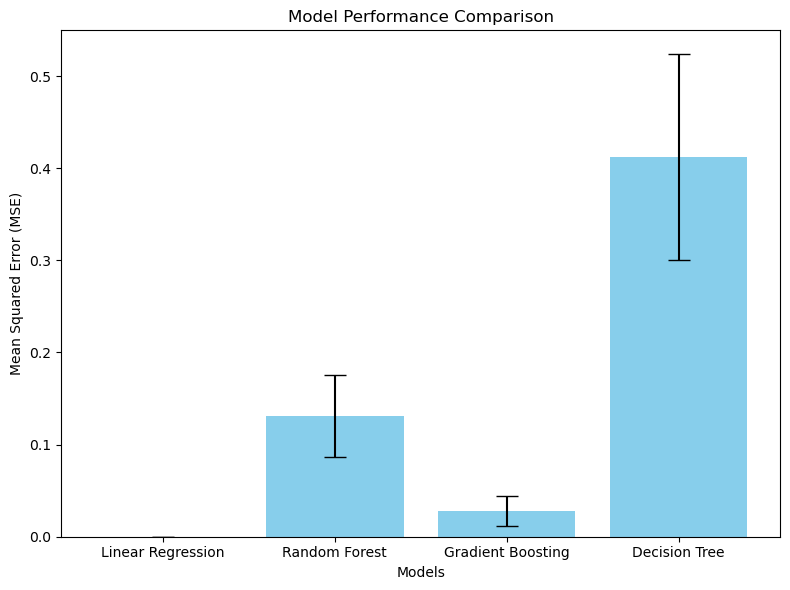

In [61]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree']

# Mean squared errors for each model
mse = [0.0, 0.1309952972972973, 0.027598756591081647, 0.4117340286831812]

# Standard deviations (confidence intervals) for MSE
std_dev = [0.0, 0.044473786379197425, 0.016305324506680593, 0.11169576064653929]

# Create a bar plot with error bars
plt.figure(figsize=(8, 6))
plt.bar(models, mse, yerr=std_dev, capsize=8, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()